In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from scipy.stats import skew
import seaborn as sns


In [2]:
raw_data = pd.read_csv('Housing.csv')
data = raw_data.copy()
raw_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
raw_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
raw_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

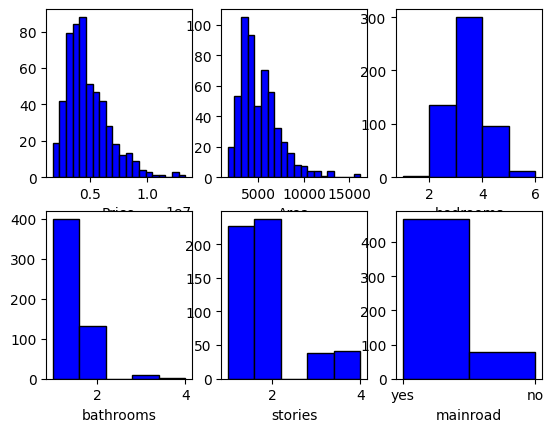

In [6]:
plt.subplot(2,3,1)
plt.hist(data['price'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Price')

plt.subplot(2,3,2)
plt.hist(data['area'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Area')

plt.subplot(2,3,3)
plt.hist(data['bedrooms'], bins=5, color='blue', edgecolor='black')
plt.xlabel('bedrooms')

plt.subplot(2,3,4)
plt.hist(data['bathrooms'], bins=5, color='blue', edgecolor='black')
plt.xlabel('bathrooms')

plt.subplot(2,3,5)
plt.hist(data['stories'], bins=5, color='blue', edgecolor='black')
plt.xlabel('stories')

plt.subplot(2,3,6)
plt.hist(data['mainroad'], bins=2, color='blue', edgecolor='black')
plt.xlabel('mainroad')

plt.show()

In [7]:
#function to remove outliers based on IQR method. 
# def remove_outliers_iqr(df, columns):
#     """
#     Remove outliers using Interquartile Range (IQR) method
    
#     Parameters:
#     df (pandas.DataFrame): Input dataframe
#     columns (list): Columns to check for outliers
    
#     Returns:
#     pandas.DataFrame: Dataframe with outliers removed
#     """
#     df_cleaned = df.copy()
#     for col in columns:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         df_cleaned = df_cleaned[
#             (df_cleaned[col] >= lower_bound) & 
#             (df_cleaned[col] <= upper_bound)
#         ]
    
#     return df_cleaned

In [8]:
# #removing outliers
# columns = ['price', 'area']
# data = remove_outliers_iqr(data, columns)
# data

In [9]:
# df_all = pd.concat([data, raw_data]).drop_duplicates(keep=False)
# df_all


In [10]:
# investigating Skewness:
skewness_price = skew(data['price'])
skewness_are = skew(data['area'])

print(f"Price Skewness: {skewness_price}")
print(f"Area Skewness: {skewness_are}")

Price Skewness: 1.2088998457878217
Area Skewness: 1.3175492613408553


In [11]:
# fixing skewness by log transformation
data['price'] = np.log(data['price'])
data['area'] = np.log(data['area'])

In [12]:
# fixing skewness by SQRT transformation
# data['price'] = np.sqrt(data['price'])
# data['area'] = np.sqrt(data['area'])


In [13]:
# # fixing skewness by CBRT transformation
# data['price'] = np.cbrt(data['price'])
# data['area'] = np.cbrt(data['area'])


In [14]:
# # fixing skewness by Yeo-Johnson Transformation
# pt = PowerTransformer(method='yeo-johnson')
# data['price'] = pt.fit_transform(data[['price']])
# data['area'] = pt.fit_transform(data[['area']])

In [15]:
for col in data.columns:
    print(f'{col}:', data[col].isnull().sum())

price: 0
area: 0
bedrooms: 0
bathrooms: 0
stories: 0
mainroad: 0
guestroom: 0
basement: 0
hotwaterheating: 0
airconditioning: 0
parking: 0
prefarea: 0
furnishingstatus: 0


In [16]:
# encoding the categorical variables
#encodign binary columns
label_encoder = LabelEncoder()

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

df = data.copy()

for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
# encoding furnishingstatus via one-hot encoding
#df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=False)
# for col in df.columns:
#     if 'furnishingstatus' in col:
#         df[col] = df[col].astype('int64')
# df

# encoding furnishingstatus via ordinal encoding
categories = [['unfurnished', 'semi-furnished', 'furnished']] 
encoder = OrdinalEncoder(categories=categories)
df['furnishingstatus'] = encoder.fit_transform(df[['furnishingstatus']])
df.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,8.911934,4,2,3,1,0,0,0,1,2,1,2.0
1,16.321036,9.100526,4,4,4,1,0,0,0,1,3,0,2.0
2,16.321036,9.206332,3,2,2,1,0,1,0,0,2,1,1.0
3,16.318175,8.922658,4,2,2,1,0,1,0,1,3,1,2.0
4,16.250001,8.911934,4,1,2,1,1,1,0,1,2,0,2.0


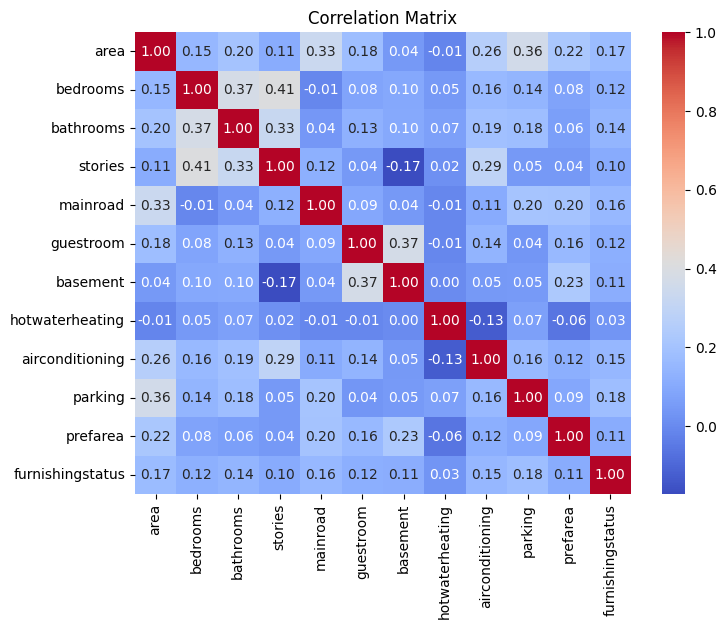

                      area  bedrooms  bathrooms   stories  mainroad  \
area              1.000000  0.150460   0.202610  0.108145  0.331604   
bedrooms          0.150460  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.202610  0.373930   1.000000  0.326165  0.042398   
stories           0.108145  0.408564   0.326165  1.000000  0.121706   
mainroad          0.331604 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.180190  0.080549   0.126469  0.043538  0.092337   
basement          0.043305  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating  -0.013725  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.262423  0.160603   0.186915  0.293602  0.105423   
parking           0.360774  0.139270   0.177496  0.045547  0.204433   
prefarea          0.219706  0.079023   0.063472  0.044425  0.199876   
furnishingstatus  0.167420  0.123244   0.143559  0.104672  0.156726   

                  guestroom  basement  hotwaterheating  airconditioning  \
a

In [17]:
# investigating Colinearity:
# Calculate the correlation matrix
df_cor = df.copy()
params = df_cor.columns.tolist()
params.remove('price')
paramers = df_cor[params]
paramers.head()
correlation_matrix = paramers.corr()

# Visualize the correlation matrix (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Print the correlation matrix
print(correlation_matrix)

In [18]:
# Feature engineering: Adding new features
# Adding a new feature 'bedroom_per_stories'
#df['bedroom_per_stories'] = df['bedrooms'] / df['stories']

In [19]:
# # Feature engineering: PCA
# # Scaling the numerical features
# PCA_df = df[['price', 'area']]
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(PCA_df)
# df_scaled = pd.DataFrame(data=df_scaled, columns=['price', 'area'])
# df = df.drop(columns=['price', 'area'])
# df_scaled_all = pd.concat([df_scaled, df], axis=1)
# df_scaled_X = df_scaled_all.drop(columns=['price'])

# pca = PCA(n_components=3)
# PCA_df_scaled_arr = pca.fit_transform(df_scaled_X)

# PCAs = []

# for i in range(PCA_df_scaled_arr.shape[1]):
#     PCAs.append(f'PCA{i+1}')
    
# PCA_df_scaled = pd.DataFrame(data=PCA_df_scaled_arr, columns=PCAs)
# PCA_df_scaled

In [20]:
# # Figuring out the best features
# # ... (PCA code from previous examples) ...

# explained_variance_ratio = pca.explained_variance_ratio_
# cumulative_variance = explained_variance_ratio.cumsum()

# # Scree Plot
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Scree Plot')
# plt.show()

# # Cumulative Explained Variance Plot
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Cumulative Explained Variance')
# plt.show()

# # Example: Keep components explaining at least 90% of the variance
# n_components = np.argmax(cumulative_variance >= 0.90) + 1  # +1 for 1-based indexing
# print(f"Number of components to keep for 90% variance: {n_components}")
# pca_90 = PCA(n_components=0.90) # directly specify the variance in the PCA call
# X_pca_90 = pca_90.fit_transform(df_scaled_X)

In [21]:
# Feature engineering: Regularization
# Scaling the numerical features
Scale_df = df[['price', 'area']]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(Scale_df)
df_scaled = pd.DataFrame(data=df_scaled, columns=['price', 'area'])
df = df.drop(columns=['price', 'area'])
df_scaled_all = pd.concat([df_scaled, df], axis=1)
df_scaled_X = df_scaled_all.drop(columns=['price'])

X_scaled = df_scaled_X
y = df_scaled_all['price']

# # Regularization using Lasso1
# lasso = Lasso(alpha=0.3)  # Tune alpha! Start with a small value and increase if needed.
# lasso.fit(X, y)

# # Regularization using Ridge
# ridge = Ridge(alpha=1.0)  # Tune alpha!
# ridge.fit(X, y)

In [22]:
#Univariate Linear Regression

model = LinearRegression()
model.fit(X_scaled[['area']], y)
y_pred = model.predict(X_scaled[['area']])

r2 = r2_score(y, y_pred)
print(f"R-squared of Univariate Linear Regression: {r2}")

mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error of Univariate Linear Regression: {mse}")

R-squared of Univariate Linear Regression: 0.33649906166120647
Mean Squared Error of Univariate Linear Regression: 0.6635009383387935


In [23]:
#Multivariate Linear Regression

model = LinearRegression()
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

r2 = r2_score(y, y_pred)
print(f"R-squared of Multivariate Linear Regression: {r2}")

mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error of Multivariate Linear Regression: {mse}")

R-squared of Multivariate Linear Regression: 0.7005416693434587
Mean Squared Error of Multivariate Linear Regression: 0.2994583306565412


In [24]:
#polynomial linear regression
def poly_nomial_regression(X, y, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False) # include_bias=False to avoid adding an intercept column of 1
    X_poly = poly.fit_transform(X)
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, mse

In [25]:
for degree in range(2, 6):
    print("r2 for poly nomial reg:", poly_nomial_regression(X_scaled, y, degree)[0], "\n", "mse for poly nomial reg:", poly_nomial_regression(X_scaled, y, degree)[1])

r2 for poly nomial reg: 0.767171391508777 
 mse for poly nomial reg: 0.23282860849122294
r2 for poly nomial reg: 0.8875767732638141 
 mse for poly nomial reg: 0.11242322673618584
r2 for poly nomial reg: 0.9786106014086782 
 mse for poly nomial reg: 0.021389398591321798
r2 for poly nomial reg: 0.983357236121431 
 mse for poly nomial reg: 0.01664276387856903


In [26]:
#polynomial linear regression with Regularization with Lasso
def poly_nomial_LassoReg(X, y, degree, alpha):
    poly = PolynomialFeatures(degree=degree, include_bias=False) # include_bias=False to avoid adding an intercept column of 1
    X_poly = poly.fit_transform(X)
    lasso = Lasso(alpha=alpha)  # Tune alpha! Start with a small value and increase if needed.
    lasso.fit(X_poly, y)
    y_pred = lasso.predict(X_poly)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, mse

In [27]:
for degree in range(2, 6):
    for alpha in [0.05, 0.1, 0.3, 0.5, 0.7, 1.0]:
        print(f'r2 for poly nomial reg with degree: {degree}, and alpha: {alpha}:', poly_nomial_LassoReg(X_scaled, y, degree, alpha)[0], "\n", f'mse for poly nomial reg with degree: {degree}, and alpha: {alpha}:', poly_nomial_LassoReg(X_scaled, y, degree, alpha)[1])


r2 for poly nomial reg with degree: 2, and alpha: 0.05: 0.6677121801154197 
 mse for poly nomial reg with degree: 2, and alpha: 0.05: 0.33228781988458034
r2 for poly nomial reg with degree: 2, and alpha: 0.1: 0.6474390478619874 
 mse for poly nomial reg with degree: 2, and alpha: 0.1: 0.3525609521380127
r2 for poly nomial reg with degree: 2, and alpha: 0.3: 0.5538724941904136 
 mse for poly nomial reg with degree: 2, and alpha: 0.3: 0.4461275058095863
r2 for poly nomial reg with degree: 2, and alpha: 0.5: 0.48013222590179816 
 mse for poly nomial reg with degree: 2, and alpha: 0.5: 0.5198677740982018
r2 for poly nomial reg with degree: 2, and alpha: 0.7: 0.39758389210657874 
 mse for poly nomial reg with degree: 2, and alpha: 0.7: 0.6024161078934213
r2 for poly nomial reg with degree: 2, and alpha: 1.0: 0.31332100706552324 
 mse for poly nomial reg with degree: 2, and alpha: 1.0: 0.6866789929344768
r2 for poly nomial reg with degree: 3, and alpha: 0.05: 0.680534029953254 
 mse for poly

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.239e+00, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.239e+00, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(


r2 for poly nomial reg with degree: 4, and alpha: 0.05: 0.7371880227889964 
 mse for poly nomial reg with degree: 4, and alpha: 0.05: 0.2628119772110036


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.903e-01, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.903e-01, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(


r2 for poly nomial reg with degree: 4, and alpha: 0.1: 0.6932261377857517 
 mse for poly nomial reg with degree: 4, and alpha: 0.1: 0.3067738622142483
r2 for poly nomial reg with degree: 4, and alpha: 0.3: 0.6059555102177232 
 mse for poly nomial reg with degree: 4, and alpha: 0.3: 0.39404448978227685
r2 for poly nomial reg with degree: 4, and alpha: 0.5: 0.5687112224244141 
 mse for poly nomial reg with degree: 4, and alpha: 0.5: 0.4312887775755859
r2 for poly nomial reg with degree: 4, and alpha: 0.7: 0.5448911650201667 
 mse for poly nomial reg with degree: 4, and alpha: 0.7: 0.4551088349798334
r2 for poly nomial reg with degree: 4, and alpha: 1.0: 0.514113055001872 
 mse for poly nomial reg with degree: 4, and alpha: 1.0: 0.48588694499812796


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.575e+01, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.575e+01, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(


r2 for poly nomial reg with degree: 5, and alpha: 0.05: 0.7846394280364657 
 mse for poly nomial reg with degree: 5, and alpha: 0.05: 0.21536057196353425


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.166e+01, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.166e+01, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(


r2 for poly nomial reg with degree: 5, and alpha: 0.1: 0.7520829358625597 
 mse for poly nomial reg with degree: 5, and alpha: 0.1: 0.24791706413744033


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.134e+00, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.134e+00, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(


r2 for poly nomial reg with degree: 5, and alpha: 0.3: 0.6788180525051835 
 mse for poly nomial reg with degree: 5, and alpha: 0.3: 0.3211819474948166
r2 for poly nomial reg with degree: 5, and alpha: 0.5: 0.6323784949898856 
 mse for poly nomial reg with degree: 5, and alpha: 0.5: 0.3676215050101143
r2 for poly nomial reg with degree: 5, and alpha: 0.7: 0.6070845643188889 
 mse for poly nomial reg with degree: 5, and alpha: 0.7: 0.39291543568111115
r2 for poly nomial reg with degree: 5, and alpha: 1.0: 0.5670234473631217 
 mse for poly nomial reg with degree: 5, and alpha: 1.0: 0.43297655263687823


In [28]:
#polynomial linear regression with Regularization with Ridge
def poly_nomial_RidgeReg(X, y, degree, alpha):
    poly = PolynomialFeatures(degree=degree, include_bias=False) # include_bias=False to avoid adding an intercept column of 1
    X_poly = poly.fit_transform(X)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_poly, y)
    y_pred = ridge.predict(X_poly)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, mse

In [29]:
for degree in range(2, 6):
    for alpha in [.05, 0.1, 0.3, 0.5, 0.7, 1.0]:
        print(f'r2 for poly nomial reg with degree: {degree}, and alpha: {alpha}:', poly_nomial_RidgeReg(X_scaled, y, degree, alpha)[0], "\n", f'mse for poly nomial reg with degree: {degree}, and alpha: {alpha}:', poly_nomial_RidgeReg(X_scaled, y, degree, alpha)[1])


r2 for poly nomial reg with degree: 2, and alpha: 0.05: 0.7670933012546057 
 mse for poly nomial reg with degree: 2, and alpha: 0.05: 0.23290669874539421
r2 for poly nomial reg with degree: 2, and alpha: 0.1: 0.7669322640572142 
 mse for poly nomial reg with degree: 2, and alpha: 0.1: 0.23306773594278588
r2 for poly nomial reg with degree: 2, and alpha: 0.3: 0.7661443122334802 
 mse for poly nomial reg with degree: 2, and alpha: 0.3: 0.2338556877665198
r2 for poly nomial reg with degree: 2, and alpha: 0.5: 0.7654002463444294 
 mse for poly nomial reg with degree: 2, and alpha: 0.5: 0.23459975365557056
r2 for poly nomial reg with degree: 2, and alpha: 0.7: 0.7647292801405436 
 mse for poly nomial reg with degree: 2, and alpha: 0.7: 0.23527071985945638
r2 for poly nomial reg with degree: 2, and alpha: 1.0: 0.7638312529329055 
 mse for poly nomial reg with degree: 2, and alpha: 1.0: 0.23616874706709443
r2 for poly nomial reg with degree: 3, and alpha: 0.05: 0.882519613530028 
 mse for pol

In [30]:
#polynomial linear regression with Regularization with ElasticNet
def poly_nomial_ElasticNet(X, y, degree, alpha):
    poly = PolynomialFeatures(degree=degree, include_bias=False) # include_bias=False to avoid adding an intercept column of 1
    X_poly = poly.fit_transform(X)
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic_net.fit(X_poly, y)
    y_pred = elastic_net.predict(X_poly)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, mse

In [31]:
for degree in range(2, 6):
    for alpha in [.05, 0.1, 0.3, 0.5, 0.7, 1.0]:
        print(f'r2 for poly nomial reg with degree: {degree}, and alpha: {alpha}:',
              poly_nomial_ElasticNet(X_scaled, y, degree, alpha)[0],
              "\n", f'mse for poly nomial reg with degree: {degree}, and alpha: {alpha}:',
              poly_nomial_ElasticNet(X_scaled, y, degree, alpha)[1])


r2 for poly nomial reg with degree: 2, and alpha: 0.05: 0.6848578193915399 
 mse for poly nomial reg with degree: 2, and alpha: 0.05: 0.3151421806084601
r2 for poly nomial reg with degree: 2, and alpha: 0.1: 0.6665689345762802 
 mse for poly nomial reg with degree: 2, and alpha: 0.1: 0.33343106542371986
r2 for poly nomial reg with degree: 2, and alpha: 0.3: 0.624788016271923 
 mse for poly nomial reg with degree: 2, and alpha: 0.3: 0.375211983728077
r2 for poly nomial reg with degree: 2, and alpha: 0.5: 0.5779514149172583 
 mse for poly nomial reg with degree: 2, and alpha: 0.5: 0.4220485850827417
r2 for poly nomial reg with degree: 2, and alpha: 0.7: 0.5252829574439926 
 mse for poly nomial reg with degree: 2, and alpha: 0.7: 0.4747170425560074
r2 for poly nomial reg with degree: 2, and alpha: 1.0: 0.47313828863021157 
 mse for poly nomial reg with degree: 2, and alpha: 1.0: 0.5268617113697884
r2 for poly nomial reg with degree: 3, and alpha: 0.05: 0.7204147923179738 
 mse for poly no

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.942e+00, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.942e+00, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(


r2 for poly nomial reg with degree: 4, and alpha: 0.05: 0.7677109046633661 
 mse for poly nomial reg with degree: 4, and alpha: 0.05: 0.23228909533663386


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.830e+00, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.830e+00, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(


r2 for poly nomial reg with degree: 4, and alpha: 0.1: 0.7363156431596725 
 mse for poly nomial reg with degree: 4, and alpha: 0.1: 0.2636843568403275
r2 for poly nomial reg with degree: 4, and alpha: 0.3: 0.6645161590260776 
 mse for poly nomial reg with degree: 4, and alpha: 0.3: 0.33548384097392236
r2 for poly nomial reg with degree: 4, and alpha: 0.5: 0.6215314738037548 
 mse for poly nomial reg with degree: 4, and alpha: 0.5: 0.37846852619624516
r2 for poly nomial reg with degree: 4, and alpha: 0.7: 0.5886853356386337 
 mse for poly nomial reg with degree: 4, and alpha: 0.7: 0.4113146643613663
r2 for poly nomial reg with degree: 4, and alpha: 1.0: 0.5682677225410793 
 mse for poly nomial reg with degree: 4, and alpha: 1.0: 0.43173227745892073


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.857e+01, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.857e+01, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(


r2 for poly nomial reg with degree: 5, and alpha: 0.05: 0.8161837007837609 
 mse for poly nomial reg with degree: 5, and alpha: 0.05: 0.18381629921623915


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.606e+01, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.606e+01, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(


r2 for poly nomial reg with degree: 5, and alpha: 0.1: 0.7842271088158078 
 mse for poly nomial reg with degree: 5, and alpha: 0.1: 0.21577289118419216


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.052e+00, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.052e+00, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(


r2 for poly nomial reg with degree: 5, and alpha: 0.3: 0.7307948026251994 
 mse for poly nomial reg with degree: 5, and alpha: 0.3: 0.2692051973748007


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.634e+00, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.634e+00, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(


r2 for poly nomial reg with degree: 5, and alpha: 0.5: 0.6958775549509035 
 mse for poly nomial reg with degree: 5, and alpha: 0.5: 0.30412244504909647


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.884e+00, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.884e+00, tolerance: 5.450e-02
  model = cd_fast.enet_coordinate_descent(


r2 for poly nomial reg with degree: 5, and alpha: 0.7: 0.6619494848430947 
 mse for poly nomial reg with degree: 5, and alpha: 0.7: 0.33805051515690526
r2 for poly nomial reg with degree: 5, and alpha: 1.0: 0.6319180255841579 
 mse for poly nomial reg with degree: 5, and alpha: 1.0: 0.3680819744158422


In [ ]:
# K-fold cross-validation for Polynomial Linear Regression
def k_fold_cross_validation(X, y, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False) # include_bias=False to avoid adding an intercept column of 1
    X_poly = poly.fit_transform(X)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    r2 = cross_val_score(model, X_poly, y, cv=kfold, scoring='r2')
    r2 = r2.mean()
    mse = cross_val_score(model, X_poly, y, cv=kfold, scoring='neg_mean_squared_error')
    mse = -mse.mean()
    return r2, mse

In [48]:
for degree in range(2, 6):
        print(f'r2 for poly nomial reg with degree: {degree}:',
              k_fold_cross_validation(X_scaled, y, degree)[0],
              "\n", f'mse for poly nomial reg with degree: {degree}',
              k_fold_cross_validation(X_scaled, y, degree)[1])


r2 for poly nomial reg with degree: 2: 0.6011573164741651 
 mse for poly nomial reg with degree: 2 0.37758600568158496
r2 for poly nomial reg with degree: 3: -4.810699975889084 
 mse for poly nomial reg with degree: 3 5.391172237980134
r2 for poly nomial reg with degree: 4: -28296.941818518222 
 mse for poly nomial reg with degree: 4 26005.385962252192
r2 for poly nomial reg with degree: 5: -26224035.98815858 
 mse for poly nomial reg with degree: 5 36573512.67846569


In [34]:
# K-fold cross-validation for Polynomial Linear Regression with Regularization with Ridge
def k_fold_poly_ridge(X, y, degree, alpha):
    poly = PolynomialFeatures(degree=degree, include_bias=False) # include_bias=False to avoid adding an intercept column of 1
    X_poly = poly.fit_transform(X)
    ridge = Ridge(alpha=alpha)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    r2 = cross_val_score(ridge, X_poly, y, cv=kfold, scoring='r2')
    r2 = r2.mean()
    mse = cross_val_score(ridge, X_poly, y, cv=kfold, scoring='neg_mean_squared_error')
    mse = -mse.mean()
    return r2, mse

In [35]:
# Choose the best degree and alpha in polynomial regression with Ridge regularization

def best_r2_mse(X, y, degree, alphas):
    best_r2 = 0
    best_mse = 10000
    best_degree_r2 = 0
    best_alpha_r2 = 0
    best_degree_mse = 0
    best_alpha_mse = 0
    
    for degree in range(2, degree):
        for alpha in alphas:
            r2 = k_fold_poly_ridge(X, y, degree, alpha)[0]
            mse = k_fold_poly_ridge(X, y, degree, alpha)[1]
            if r2 > best_r2:
                best_r2 = r2
                best_degree_r2 = degree
                best_alpha_r2 = alpha
            if mse < best_mse:
                best_mse = mse
                best_degree_mse = degree
                best_alpha_mse = alpha
    
    return best_degree_r2, best_alpha_r2, best_r2, best_degree_mse, best_alpha_mse, best_mse


In [36]:
alphas = [0.05, 0.1, 0.3, 0.5, 0.7, 1.0 , 1.5, 2.0]
best_degree_r2, best_alpha_r2, best_r2, best_degree_mse, best_alpha_mse, best_mse = best_r2_mse(X_scaled, y, 6, alphas)

print(f"Best degree for R2: {best_degree_r2}, Best alpha for R2: {best_alpha_r2}, Best R2: {best_r2}")
print(f"Best degree for MSE: {best_degree_mse}, Best alpha for MSE: {best_alpha_mse}, Best MSE: {best_mse}")

Best degree for R2: 2, Best alpha for R2: 2.0, Best R2: 0.6493136237736744
Best degree for MSE: 2, Best alpha for MSE: 2.0, Best MSE: 0.33489627905048336


In [37]:
# K-fold cross-validation for multivariate Linear Regression
def k_fold_multi(X, y):
    model = LinearRegression()
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    r2 = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    r2 = r2.mean()
    mse = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    mse = -mse.mean()
    return r2, mse

In [38]:
r2 , mse = k_fold_multi(X_scaled, y)
print(f"R2 for multivariate Linear Regression: {r2}")
print(f"MSE for multivariate Linear Regression: {mse}")

R2 for multivariate Linear Regression: 0.672002513131536
MSE for multivariate Linear Regression: 0.31928521384595465


In [39]:
# K-fold cross-validation for multivariate Linear Regression with ridge regularization
def k_fold_multi_ridge(X, y, alpha):
    model = Ridge(alpha=alpha)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    r2 = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    r2 = r2.mean()
    mse = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    mse = -mse.mean()
    return r2, mse

In [40]:
# Choose the best degree and alpha in multivariate regression 
def best_r2_mse_multi(X, y, alphas):
    best_r2 = 0
    best_mse = 10000
    best_alpha_r2 = 0
    best_alpha_mse = 0
    
    for alpha in alphas:
        r2 = k_fold_multi_ridge(X, y, alpha)[0]
        mse = k_fold_multi_ridge(X, y, alpha)[1]
        if r2 > best_r2:
            best_r2 = r2
            best_alpha_r2 = alpha
        if mse < best_mse:
            best_mse = mse
            best_alpha_mse = alpha
    
    return best_alpha_r2, best_r2, best_alpha_mse, best_mse

In [41]:
alphas = [0.05, 0.1, 0.3, 0.5, 0.7, 1.0]
best_alpha_r2, best_r2, best_alpha_mse, best_mse = best_r2_mse_multi(X_scaled, y, alphas)

print(f"Best degree for R2: {best_degree_r2}, Best alpha for R2: {best_alpha_r2}, Best R2: {best_r2}")
print(f"Best degree for MSE: {best_degree_mse}, Best alpha for MSE: {best_alpha_mse}, Best MSE: {best_mse}")

Best degree for R2: 2, Best alpha for R2: 1.0, Best R2: 0.672640753244142
Best degree for MSE: 2, Best alpha for MSE: 1.0, Best MSE: 0.31893123959357494


In [42]:
def plot_actual_vs_predicted(y, y_pred):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y, y=y_pred)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Diagonal line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Plot')
    plt.show()

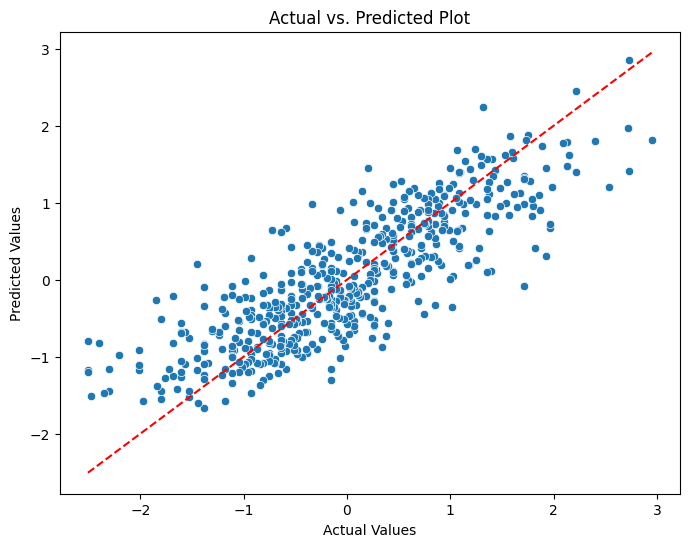

In [43]:
plot_actual_vs_predicted(y, y_pred)

In [44]:
def plot_residuals(y, y_pred):
    residuals = y - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True)
    plt.axvline(x=0, color='red', linestyle='--')  # Add a vertical line at 0
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Residuals Plot')
    plt.show()

In [45]:
def plot_residuals_hist(y, y_pred):
    residuals = y - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, bins=20)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    plt.show()
